In [16]:
# Install OpenCV with SIFT support
!pip install opencv-contrib-python

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [17]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


Saving Screenshot 2026-01-02 143622.png to Screenshot 2026-01-02 143622.png


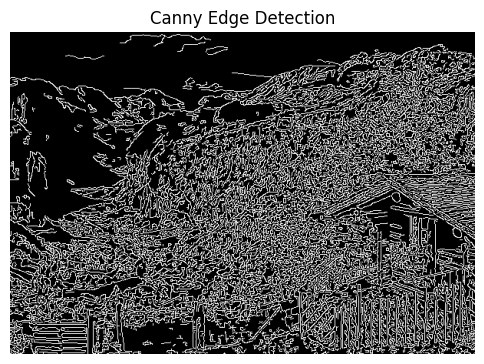

In [18]:
edges = cv2.Canny(gray, threshold1=100, threshold2=200)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


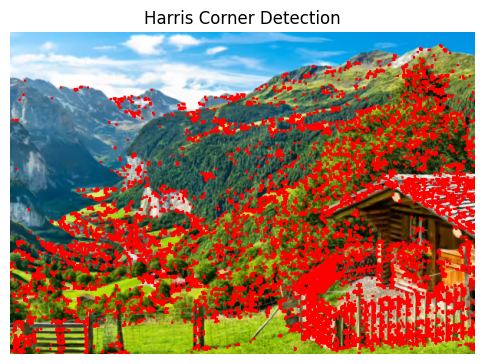

In [19]:
gray_float = np.float32(gray)
harris = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

harris_dilated = cv2.dilate(harris, None)
corner_img = img.copy()
corner_img[harris_dilated > 0.01 * harris_dilated.max()] = [0, 0, 255]

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis("off")
plt.show()


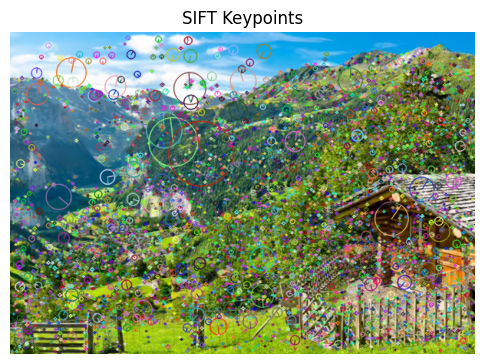

In [20]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

sift_img = cv2.drawKeypoints(
    img, keypoints, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(sift_img, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints")
plt.axis("off")
plt.show()


In [28]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/Screenshot 2026-01-02 140849.png')
img2 = cv2.imread('/content/Screenshot 2026-01-02 143622.png')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)



In [29]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)


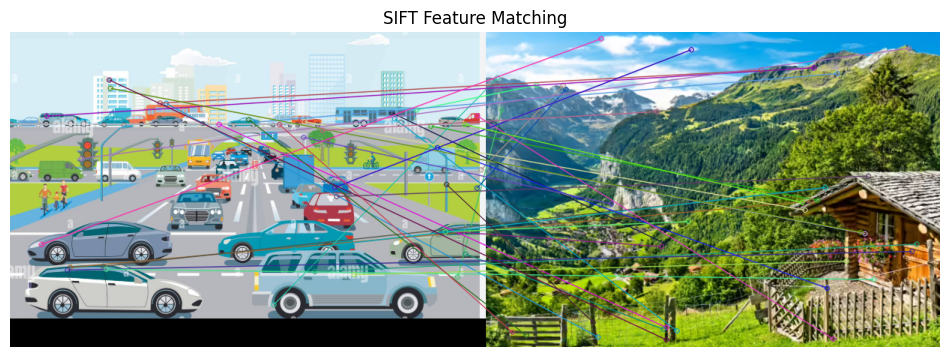

In [30]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

matched_img = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    matches[:40], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title("SIFT Feature Matching")
plt.axis("off")
plt.show()


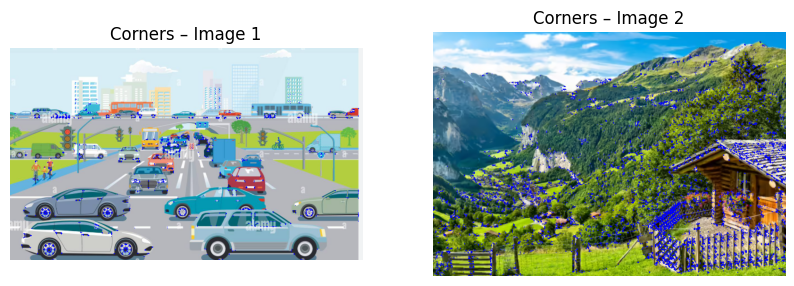

In [31]:
h1 = cv2.cornerHarris(np.float32(gray1), 2, 3, 0.04)
h2 = cv2.cornerHarris(np.float32(gray2), 2, 3, 0.04)

img1_corners = img1.copy()
img2_corners = img2.copy()

img1_corners[h1 > 0.01*h1.max()] = [255,0,0]
img2_corners[h2 > 0.01*h2.max()] = [255,0,0]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1_corners, cv2.COLOR_BGR2RGB))
plt.title("Corners – Image 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2_corners, cv2.COLOR_BGR2RGB))
plt.title("Corners – Image 2")
plt.axis("off")
plt.show()
